Testicles


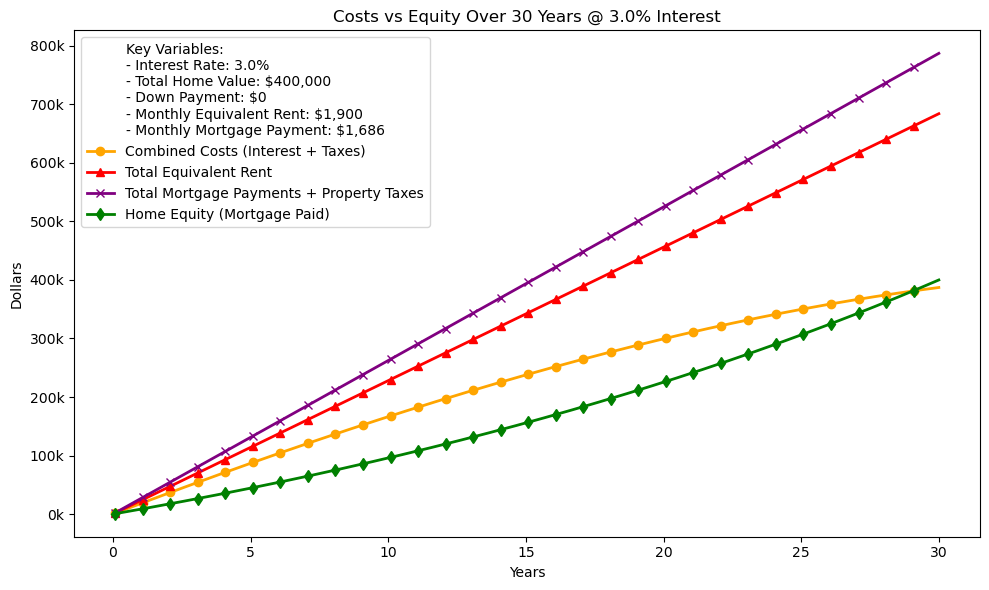

In [15]:
# Configurable Variables
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


interest_rate = 0.030  # Annual interest rate (e.g., 0.03 for 3%)
total_home_value = 400_000  # Total value of the home in dollars
down_payment = 0  # Down payment amount in dollars
years = 30  # Loan term in years
monthly_rent = 1900  # Equivalent rent in dollars
property_tax_rate = 0.015 # property tax rate (averaged on whole value)

# Current formatting function
def currency_format(x, pos):
    return f'{int(x / 1_000)}k'

# Function for generating mortgage charts
def generate_mortgage_chart_with_down_payment(interest_rate, principal, years, total_home_value, down_payment, monthly_rent):
    months = years * 12
    monthly_interest_rate = interest_rate / 12
    loan_amount = total_home_value - down_payment  # Adjusted loan amount
    monthly_payment = loan_amount * (
        monthly_interest_rate * (1 + monthly_interest_rate) ** months
    ) / (
        (1 + monthly_interest_rate) ** months - 1
    )
    
    balance = loan_amount
    cumulative_interest = 0
    cumulative_property_tax = 0
    cumulative_rent = 0
    total_mortgage_plus_tax = []
    combined_costs = []
    total_rent = []
    equity = []
    
    for month in range(1, months + 1):
        interest_payment = balance * monthly_interest_rate
        principal_payment = monthly_payment - interest_payment
        balance -= principal_payment
        cumulative_interest += interest_payment
        cumulative_property_tax += (property_tax_rate * total_home_value) / 12  # Property taxes based on home value
        cumulative_rent += monthly_rent
        
        total_mortgage_plus_tax.append(monthly_payment * month + cumulative_property_tax)
        combined_costs.append(cumulative_interest + cumulative_property_tax)
        total_rent.append(cumulative_rent)
        equity.append(total_home_value - balance)
    
    years = [m / 12 for m in range(1, months + 1)]
    
    # Generate the chart
    plt.figure(figsize=(10, 6))
    plt.plot(years, combined_costs, label='Combined Costs (Interest + Taxes)', color='orange', linewidth=2, marker='o', markevery=12)
    plt.plot(years, total_rent, label='Total Equivalent Rent', color='red', linewidth=2, marker='^', markevery=12)
    plt.plot(years, total_mortgage_plus_tax, label='Total Mortgage Payments + Property Taxes', color='purple', linewidth=2, marker='x', markevery=12)
    plt.plot(years, equity, label='Home Equity (Mortgage Paid)', color='green', linewidth=2, marker='d', markevery=12)
    plt.title(f'Costs vs Equity Over {years[-1]:.0f} Years @ {interest_rate*100:.1f}% Interest')
    plt.xlabel('Years')
    plt.ylabel('Dollars')
    plt.legend(title="Key Variables:\n- Interest Rate: {:.1f}%\n- Total Home Value: ${:,}\n- Down Payment: ${:,}\n- Monthly Equivalent Rent: ${:,}\n- Monthly Mortgage Payment: ${:,}".format(
        interest_rate * 100, total_home_value, down_payment, monthly_rent, int(monthly_payment)))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))
    plt.tight_layout()
    plt.show()

# Generate the chart
generate_mortgage_chart_with_down_payment(
    interest_rate, total_home_value - down_payment, years, total_home_value, down_payment, monthly_rent
)
